In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import xarray as xr
import os, sys
from netCDF4 import Dataset
import numpy as np
import regionmask 
import cartopy.crs as ccrs
import warnings
from datetime import datetime, timedelta
import logging
import csv

warnings.filterwarnings(action='ignore')
%matplotlib inline

/home/thiago/.local/lib/python3.10/site-packages/geopandas/_compat.py:153: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  set_use_pygeos()
<ipython-input-1-f41f4aac969f>:1: DeprecationWarning: GeoPandas is set to use PyGEOS over Shapely. PyGEOS support is deprecatedand will be removed in GeoPandas 1.0, released in the Q1 of 2024. Please migrate to Shapely 2.0 (https://geopandas.org/en/stable/docs/user_guide/pygeos_to_shapely.html).
  import geopandas as gpd


### NetCDF4

In [1]:
# # Abrindo um arquivo do MERGE qualquer, por ex. esse do ano 2001
# ds = xr.open_dataset('../../../data/merge/processed/MERGE_CPTEC_2001.nc4', engine='netcdf4') 
# ds['longitude'] = ds['longitude'] - 360
# ds = ds.drop_vars('prmsl')
# ds

In [ ]:
# path_tmp_nc4_file = "tmp_MERGE_CPTEC_2001.nc4"
# ds.to_netcdf(path_tmp_nc4_file)

In [ ]:
# ds = xr.open_dataarray(path_tmp_nc4_file)
# ds

In [ ]:
# ds.isel(time=0)

### Shapefile

In [2]:
# Shapefile da Bacia Incremental de Itaipu
shapefilepath = '../../../data/basins/Itaipu_incremental/ItaipuInc/ItaipuInc.shp'

gdf = gpd.read_file(shapefilepath)
gdf

,Mini,CatID,Sub,Area__km2_,AreaM__km2,FixPar_Reg,geometry
0,753.0,19087.0,178.0,1186.87857,1186.87857,5.0,"POLYGON ((-54.97083 -24.96667, -54.97083 -24.9..."


<AxesSubplot:>

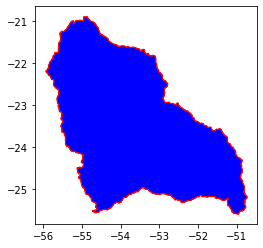

In [3]:
gdf.plot(edgecolor='red', facecolor='blue')

In [4]:
mask = regionmask.mask_geopandas(gdf, ds.isel(time=0).longitude, ds.isel(time=0).latitude)
mask

NameError: name 'ds' is not defined

In [ ]:
f, ax = plt.subplots(subplot_kw=dict(projection=ccrs.PlateCarree()))
mask.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    add_colorbar=False,
)

ax.coastlines(color="0.1");

In [5]:
# ds_masked = ds.where(mask==0)
# ds_masked

In [19]:
# plt.figure(figsize=(8, 6))
# ds_masked.isel(time=0).plot()

### Salvando novamente em netCDF4

In [ ]:
# path_tmp_nc4_file = "tmp_clipped_MERGE_CPTEC_2001.nc4"
# ds_masked.to_netcdf(path_tmp_nc4_file)

# ds = xr.open_dataset(path_tmp_nc4_file)
# ds

In [ ]:
# plt.figure(figsize=(8, 6))
# ds.isel(time=0).prec.plot()

In [ ]:
# ds.isel(time=1).prec.sum()

### Coletando a precipitação acumulada da bacia incremental especificada no shapefile p/ 1 dia ###

In [6]:
data_path = "../../../data"
raw_merge_path = "merge/raw"
processed_merge_path = "merge/processed"

# files = [f"{data_path}/{raw_merge_path}/MERGE_CPTEC_20231111.grib2",
#          f"{data_path}/{raw_merge_path}/MERGE_CPTEC_20231112.grib2",
#          f"{data_path}/{raw_merge_path}/MERGE_CPTEC_20231113.grib2"]

# ds = xr.open_mfdataset(files, concat_dim='time', combine='nested', engine='cfgrib') 

ds = xr.open_dataset(f"{data_path}/{raw_merge_path}/MERGE_CPTEC_20221111.grib2", engine='cfgrib') 

ds['longitude'] = ds['longitude'] - 360
ds = ds.drop_vars('prmsl')
ds

Ignoring index file '../../../data/merge/raw/MERGE_CPTEC_20221111.grib2.923a8.idx' incompatible with GRIB file


<xarray.Dataset>
Dimensions:     (latitude: 924, longitude: 1001)
Coordinates:
    time        datetime64[ns] ...
    step        timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 -60.05 -59.95 -59.85 ... 32.05 32.15 32.25
  * longitude   (longitude) float64 -120.1 -120.0 -119.9 ... -20.15 -20.05
    valid_time  datetime64[ns] ...
Data variables:
    prec        (latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             consensus
    GRIB_centreDescription:  Consensus
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             Consensus
    history:                 2024-03-15T10:07 GRIB to CDM+CF via cfgrib-0.9.1...

In [7]:
# Shapefile da Bacia Incremental de Itaipu
shapefilepath = f'{data_path}/basins/Itaipu_incremental/ItaipuInc/ItaipuInc.shp'

gdf = gpd.read_file(shapefilepath)
gdf

,Mini,CatID,Sub,Area__km2_,AreaM__km2,FixPar_Reg,geometry
0,753.0,19087.0,178.0,1186.87857,1186.87857,5.0,"POLYGON ((-54.97083 -24.96667, -54.97083 -24.9..."


<AxesSubplot:>

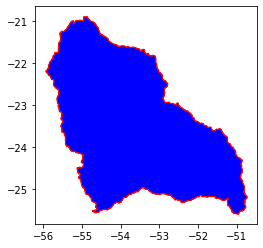

In [8]:
gdf.plot(edgecolor='red', facecolor='blue')

In [9]:
mask = regionmask.mask_geopandas(gdf,ds.longitude, ds.latitude) # ds.isel(time=0).longitude, ds.isel(time=0).latitude
mask

<xarray.DataArray 'mask' (latitude: 924, longitude: 1001)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
    time        datetime64[ns] 2022-11-11T12:00:00
    step        timedelta64[ns] 00:00:00
    surface     float64 0.0
  * latitude    (latitude) float64 -60.05 -59.95 -59.85 ... 32.05 32.15 32.25
    valid_time  datetime64[ns] 2022-11-11T12:00:00
  * longitude   (longitude) float64 -120.1 -120.0 -119.9 ... -20.15 -20.05
Attributes:
    standard_name:  region

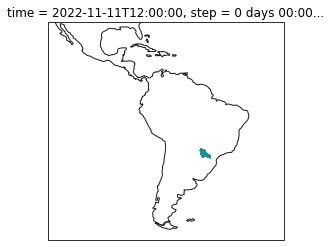

In [10]:
f, ax = plt.subplots(subplot_kw=dict(projection=ccrs.PlateCarree()))
mask.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    add_colorbar=False,
)

ax.coastlines(color="0.1");

In [11]:
ds_masked = ds.where(mask==0)
ds_masked

<xarray.Dataset>
Dimensions:     (latitude: 924, longitude: 1001)
Coordinates:
    time        datetime64[ns] 2022-11-11T12:00:00
    step        timedelta64[ns] 00:00:00
    surface     float64 0.0
  * latitude    (latitude) float64 -60.05 -59.95 -59.85 ... 32.05 32.15 32.25
  * longitude   (longitude) float64 -120.1 -120.0 -119.9 ... -20.15 -20.05
    valid_time  datetime64[ns] 2022-11-11T12:00:00
Data variables:
    prec        (latitude, longitude) float32 nan nan nan nan ... nan nan nan
Attributes:
    GRIB_edition:            2
    GRIB_centre:             consensus
    GRIB_centreDescription:  Consensus
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             Consensus
    history:                 2024-03-15T10:07 GRIB to CDM+CF via cfgrib-0.9.1...

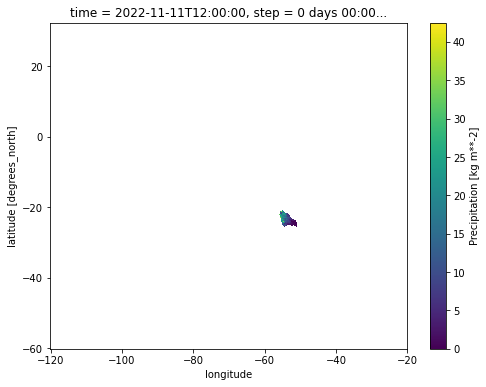

In [16]:
plt.figure(figsize=(8, 6))
# ax.coastlines(color="0.1");
ds_masked.prec.plot() # .isel(time=0)

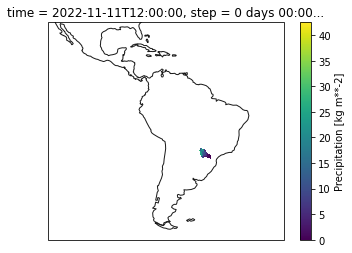

In [17]:
f, ax = plt.subplots(subplot_kw=dict(projection=ccrs.PlateCarree()))
ds_masked.prec.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
        # add_colorbar=False,
)

ax.coastlines(color="0.1");

In [27]:
ds_masked.prec.sum().values.item()

14376.25

### Gerando um csv com a precipitação acumulada no shapefile (bacia incremental) p/ cada data do MERGE --> merge_processing_prec_sum_clipped_itaipu_incremental.py

In [ ]:
# def extract_daily_prec_sum_from_clipped_ds(file_path):

#     ds = xr.open_dataset(file_path, engine='cfgrib') 

#     ds['longitude'] = ds['longitude'] - 360
#     ds = ds.drop_vars('prmsl')
#     mask = regionmask.mask_geopandas(gdf,ds.longitude, ds.latitude) 
#     ds_masked = ds.where(mask==0)
    
#     daily_prec_sum = ds_masked.prec.sum().values.item()

#     return daily_prec_sum

In [ ]:
# log_filename = "merge_processing_prec_sum_clipped_itaipu_incremental.log"

# data_path = "../../../data"
# raw_merge_path = "merge/raw"
# processed_merge_path = "merge/processed"

# # Shapefile da Bacia Incremental de Itaipu
# shapefilepath = f'{data_path}/basins/Itaipu_incremental/ItaipuInc/ItaipuInc.shp'
# gdf = gpd.read_file(shapefilepath)

# csv_file_name = "MERGE_PREC_SUM_ITAIPU_INCREMENTAL_DAILY.csv"
# csv_file_path = f"{data_path}/{processed_merge_path}/{csv_file_name}"

# data_begin = "20000602" #"<data ano/mes/dia>"
# data_end = "20231231" #"<data ano/mes/dia>"

# data_begin = datetime.strptime(data_begin, '%Y%m%d')
# data_end = datetime.strptime(data_end, '%Y%m%d')

# if __name__ == '__main__':

#     # Configuring the logging module
#     logging.basicConfig(filename=f'logs/{log_filename}', level=logging.INFO,
#                         format='%(asctime)s [%(levelname)s]: %(message)s', datefmt='%Y-%m-%d %H:%M:%S')

#     data = data_begin
#     while data <= data_end:
#         year_month_day = data.strftime("%Y%m%d")

#         file_name = 'MERGE_CPTEC_{}.grib2'.format(year_month_day)
#         file_path = f"{data_path}/{raw_merge_path}/{file_name}"

#         print(f"Processando o arquivo {file_name} da data: {year_month_day}")

#         try:
#             daily_prec_sum = extract_daily_prec_sum_from_clipped_ds(file_path)

#             with open(csv_file_path, mode='a', newline='') as f:
#                 writer = csv.writer(f)
#                 writer.writerow([data, daily_prec_sum])

#             # Log success
#             logging.info(f"Arquivo {file_name} processado com êxito")
#         except Exception as e:
#             # Log failure
#             logging.error(f"Falha ao processar o arquivo {file_name}: {str(e)}")

#         data += timedelta(days=1)

In [ ]:
# import geopandas as gpd
# import xarray as xr
# import regionmask 
# import warnings
# from datetime import datetime, timedelta
# import logging
# import csv

# warnings.filterwarnings(action='ignore')
# log_filename = "merge_processing_prec_sum_clipped_itaipu_incremental.log"

# data_path = "../../../data"
# raw_merge_path = "merge/raw"
# processed_merge_path = "merge/processed"

# # Shapefile da Bacia Incremental de Itaipu
# shapefilepath = f'{data_path}/basins/Itaipu_incremental/ItaipuInc/ItaipuInc.shp'

# csv_file_name = "MERGE_PREC_SUM_ITAIPU_INCREMENTAL_DAILY.csv"
# csv_file_path = f"{data_path}/{processed_merge_path}/{csv_file_name}"

# data_begin = "20000602" #"<data ano/mes/dia>"
# data_end = "20231231" #"<data ano/mes/dia>"

# def extract_daily_prec_sum_from_clipped_ds(file_path):

#     ds = xr.open_dataset(file_path, engine='cfgrib') 

#     ds['longitude'] = ds['longitude'] - 360
#     ds = ds.drop_vars('prmsl')
#     mask = regionmask.mask_geopandas(gdf,ds.longitude, ds.latitude) 
#     ds_masked = ds.where(mask==0)
    
#     daily_prec_sum = ds_masked.prec.sum().values.item()

#     return daily_prec_sum

# if __name__ == '__main__':

#     # Configuring the logging module
#     logging.basicConfig(filename=f'logs/{log_filename}', level=logging.INFO,
#                         format='%(asctime)s [%(levelname)s]: %(message)s', datefmt='%Y-%m-%d %H:%M:%S')

#     data_begin = datetime.strptime(data_begin, '%Y%m%d')
#     data_end = datetime.strptime(data_end, '%Y%m%d')

#     gdf = gpd.read_file(shapefilepath)

#     data = data_begin
#     while data <= data_end:
#         year_month_day = data.strftime("%Y%m%d")

#         file_name = 'MERGE_CPTEC_{}.grib2'.format(year_month_day)
#         file_path = f"{data_path}/{raw_merge_path}/{file_name}"

#         print(f"Processando o arquivo {file_name} da data: {year_month_day}")

#         try:
#             daily_prec_sum = extract_daily_prec_sum_from_clipped_ds(file_path)

#             with open(csv_file_path, mode='a', newline='') as f:
#                 writer = csv.writer(f)
#                 writer.writerow([data, daily_prec_sum])

#             # Log success
#             logging.info(f"Arquivo {file_name} processado com êxito")
#         except Exception as e:
#             # Log failure
#             logging.error(f"Falha ao processar o arquivo {file_name}: {str(e)}")

#         data += timedelta(days=1)

In [ ]:
# with open(csv_file_path, mode='a', newline='') as f:
#     writer = csv.writer(f)
#     writer.writerow(['name', 'age'])